In [ ]:
# Generic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Set
from sklearn.datasets import fetch_california_housing

In [ ]:
# get the data set

data = fetch_california_housing()

In [ ]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# independent data
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
data.data.shape

(20640, 8)

In [ ]:
# Dependent data
df['Target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 51.6 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

report = sv.analyze(df)

report.show_html("./report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderInsufficientPrivileges
geolocator = Nominatim(user_agent="Geocoding")

In [ ]:
# Feature Engineering

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = 'Geocoding')

In [ ]:
#geolocator.reverse("37.88"+" , "+"-122.23")[0]

In [ ]:
import pickle

In [ ]:
def location(cord):
    Latitude = str(cord[0])
    Longitude = str(cord[1])

    location = geolocator.reverse(Latitude+" , "+Longitude).raw['address']

    if location.get('Road') is None:
        location['Road'] = None

    if location.get('County') is None:
        location['County'] = None

    loc_update['County'].append(location['County'])
    loc_update['Road'].append(location['Road'])

In [ ]:
loc_update = {"County":[],
              "Road": [],
              "Neighbourhood":[]}

for i, cord in enumerate(df.iloc[:,6:-1].values):

    location(cord)

    pickle.dump(loc_update, open('loc_update.pickle','wb'))
    if i % 100 == 0:
        print(i)

GeocoderInsufficientPrivileges: Non-successful status code 403

In [ ]:
!pip install geopy

In [ ]:
import geopy
from geopy.geocoders import Nominatim
import pickle

In [ ]:
geolocator = Nominatim(user_agent="Geocoding")

In [ ]:
loc_update = {"County":[],
              "Road": [],
              "Neighbourhood":[]}

for i, cord in enumerate(df.iloc[:,6:-1].values):

    Latitude = str(cord[0])
    Longitude = str(cord[1])

    location = geolocator.reverse(str(Latitude) + ", " + str(Longitude)).raw['address']

    if location.get('County') is not None:
        loc_update["County"].append(location.get('County'))
    else:
        loc_update["County"].append(None)

    if location.get('Road') is not None:
        loc_update["Road"].append(location.get('Road'))
    else:
        loc_update["Road"].append(None)

    if location.get('Neighbourhood') is not None:
        loc_update["Neighbourhood"].append(location.get('Neighbourhood'))
    else:
        loc_update["Neighbourhood"].append(None)

    pickle.dump(loc_update, open('loc_update.pickle','wb'))
    if i % 100 == 0:
        print(i)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
cal_housing = fetch_california_housing()
X = cal_housing.data
y = cal_housing.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
print(model.score(X_test, y_test))

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    input_data = request.get_json()
    input_features = [input_data['feature1'], input_data['feature2'],...]
    prediction = model.predict([input_features])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)

## 12/04/2024

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('housing.csv')

# Split the comma-separated values into separate columns
df = df['longitude'].str.split(',', expand=True)

# Rename the columns
df.columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
              'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

# Save the DataFrame to another CSV file
df.to_csv('output_file.csv', index=False)


In [ ]:
housing = pd.read_csv("output_file.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

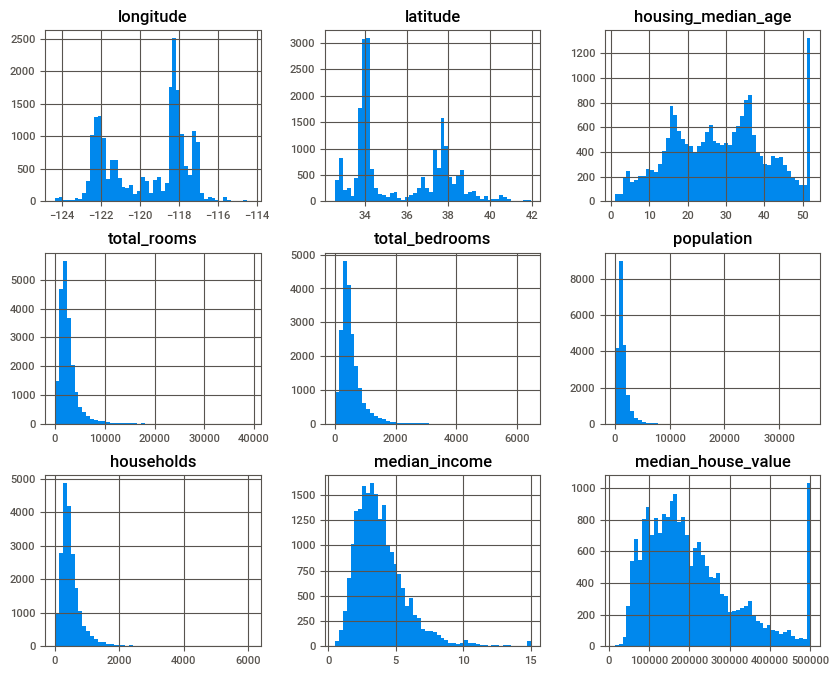

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10, 8))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

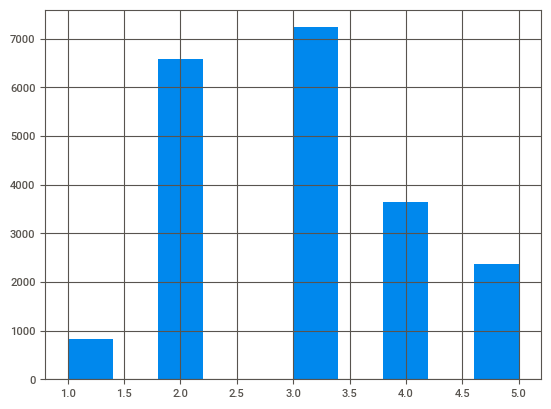

In [ ]:
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
plt.show()

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(housing, housing["income_cat"]):
#     strat_train_set = housing.loc[train_index]
#     strat_test_set = housing.loc[test_index]
# print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

In [ ]:
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop('income_cat', axis=1, inplace=True)
# housing = strat_train_set.copy()

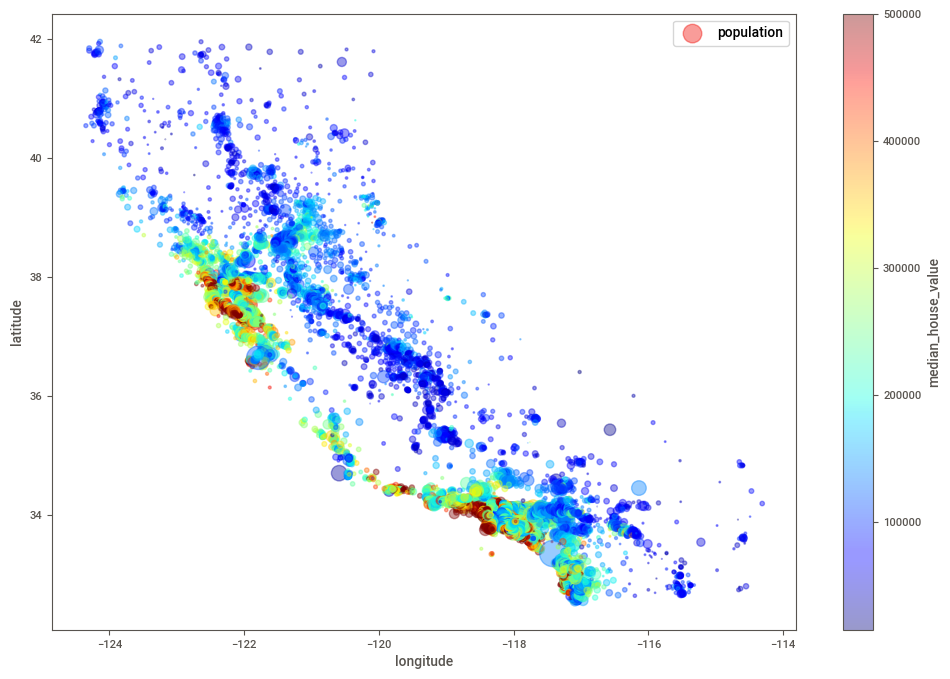

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population',
figsize=(12, 8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [ ]:
housing["ocean_proximity"].dtype

dtype('O')

In [ ]:
housing["ocean_proximity"] = housing["ocean_proximity"].astype("category")

In [ ]:
housing = housing[housing["ocean_proximity"].notnull()]

In [ ]:
housing["ocean_proximity"] = housing["ocean_proximity"].map({
    "INLAND": 0,
    "NEAR OCEAN": 1,
    "NEAR BAY": 2,
    "ISLAND": 3,
})

In [ ]:
corr_matrix = housing.corr()
print(corr_matrix.median_house_value.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
ocean_proximity       0.516465
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [ ]:
corr_matrix = housing.corr()
print(corr_matrix.median_house_value.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
ocean_proximity       0.516465
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [ ]:
# Data Preparation
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

housing_num = housing.drop("ocean_proximity", axis=1)

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

data = housing.iloc[:5]
labels = housing_labels.iloc[:5]
data_preparation = full_pipeline.transform(data)
print("Predictions: ", lin_reg.predict(data_preparation))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
